In [1]:
import pyshtools
import pygmt



In [2]:
# Load coefficients for Mars magnetic model of Langlais++ 2018
clm_lcs, lmax = pyshtools.shio.shread('./shc/Langlais++_Mars.cof')

clmm = pyshtools.SHMagCoeffs.from_array(clm_lcs, r0=3389500.)

clmm.info()

kind = 'real'
normalization = 'schmidt'
csphase = 1
lmax = 134
r0 (m) = 3389500.0
error_kind = None
header = None
header2 = None
units = 'nT'
year = None


In [3]:
# expand coefficients to get maps at a specified altitude and with a maximum degree of 150
magg = clmm.expand(lmax=150,a=clmm.r0+200000.)


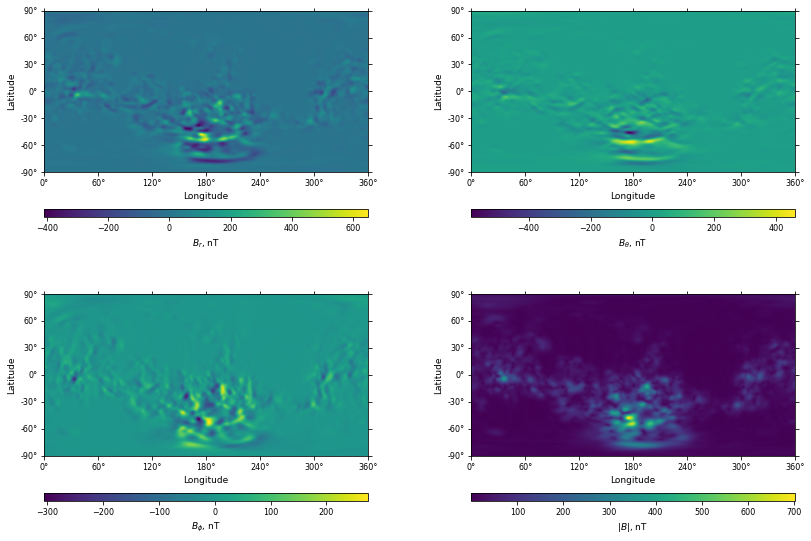

In [4]:
# pyshtools command for plotting three components and total field
fig,ax = magg.plot(show=False)
fig.set_figwidth(12)
fig.set_figheight(8)

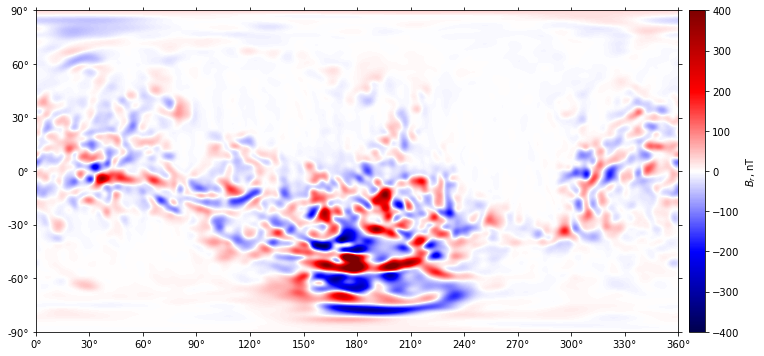

In [5]:
# Example of plotting radial component alone
fig,ax = magg.plot_rad(show=False, cmap='seismic', cmap_limits=[-400,400])
fig.set_figwidth(12)
fig.set_figheight(8)

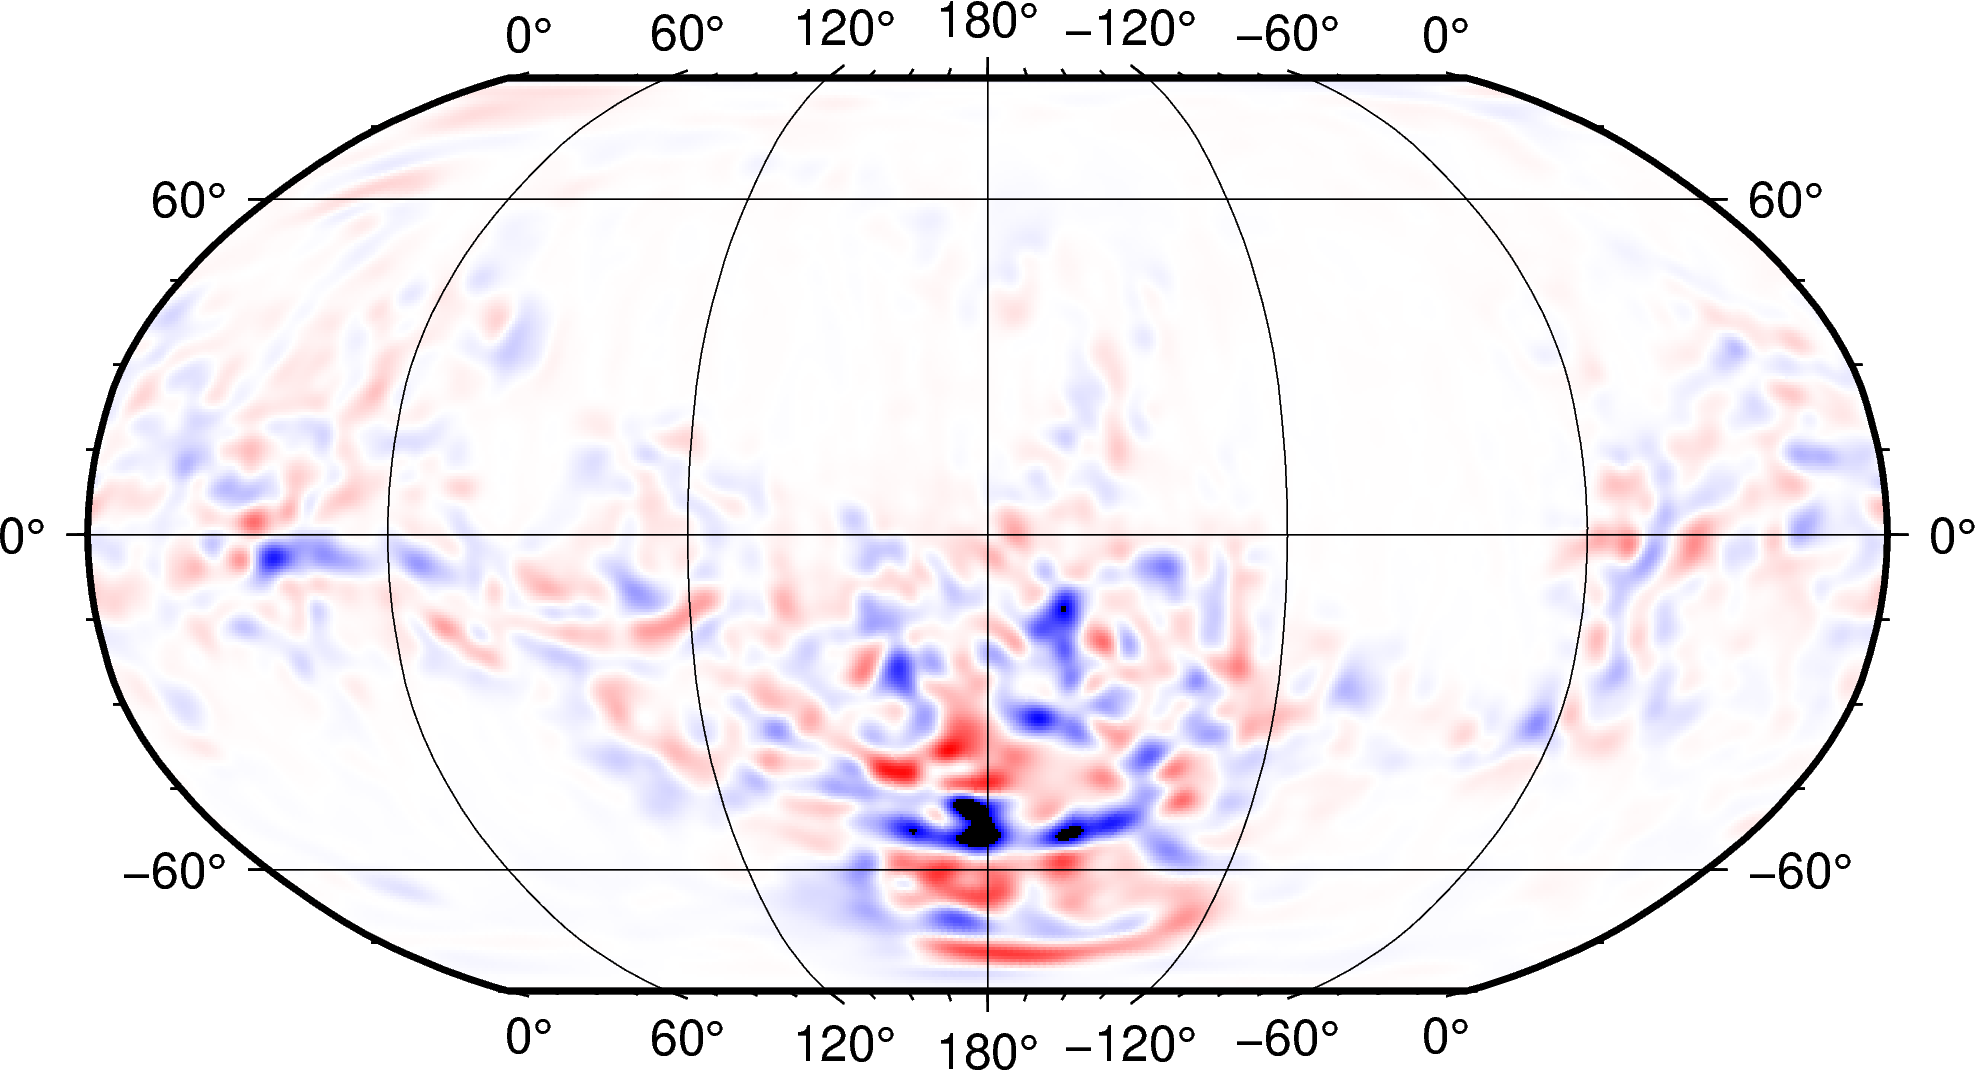

In [6]:
# Example using pygmt to make the plot (more customisable)
fig = pygmt.Figure()

pygmt.config(COLOR_FOREGROUND='black', COLOR_BACKGROUND='black')
pygmt.makecpt(cmap='polar', series='-400/400', reverse=True)

fig.grdimage(region='g', projection='N6i', grid=magg.rad.to_xarray(), n='b')
fig.basemap(frame='afg')
fig.show(width=1000)


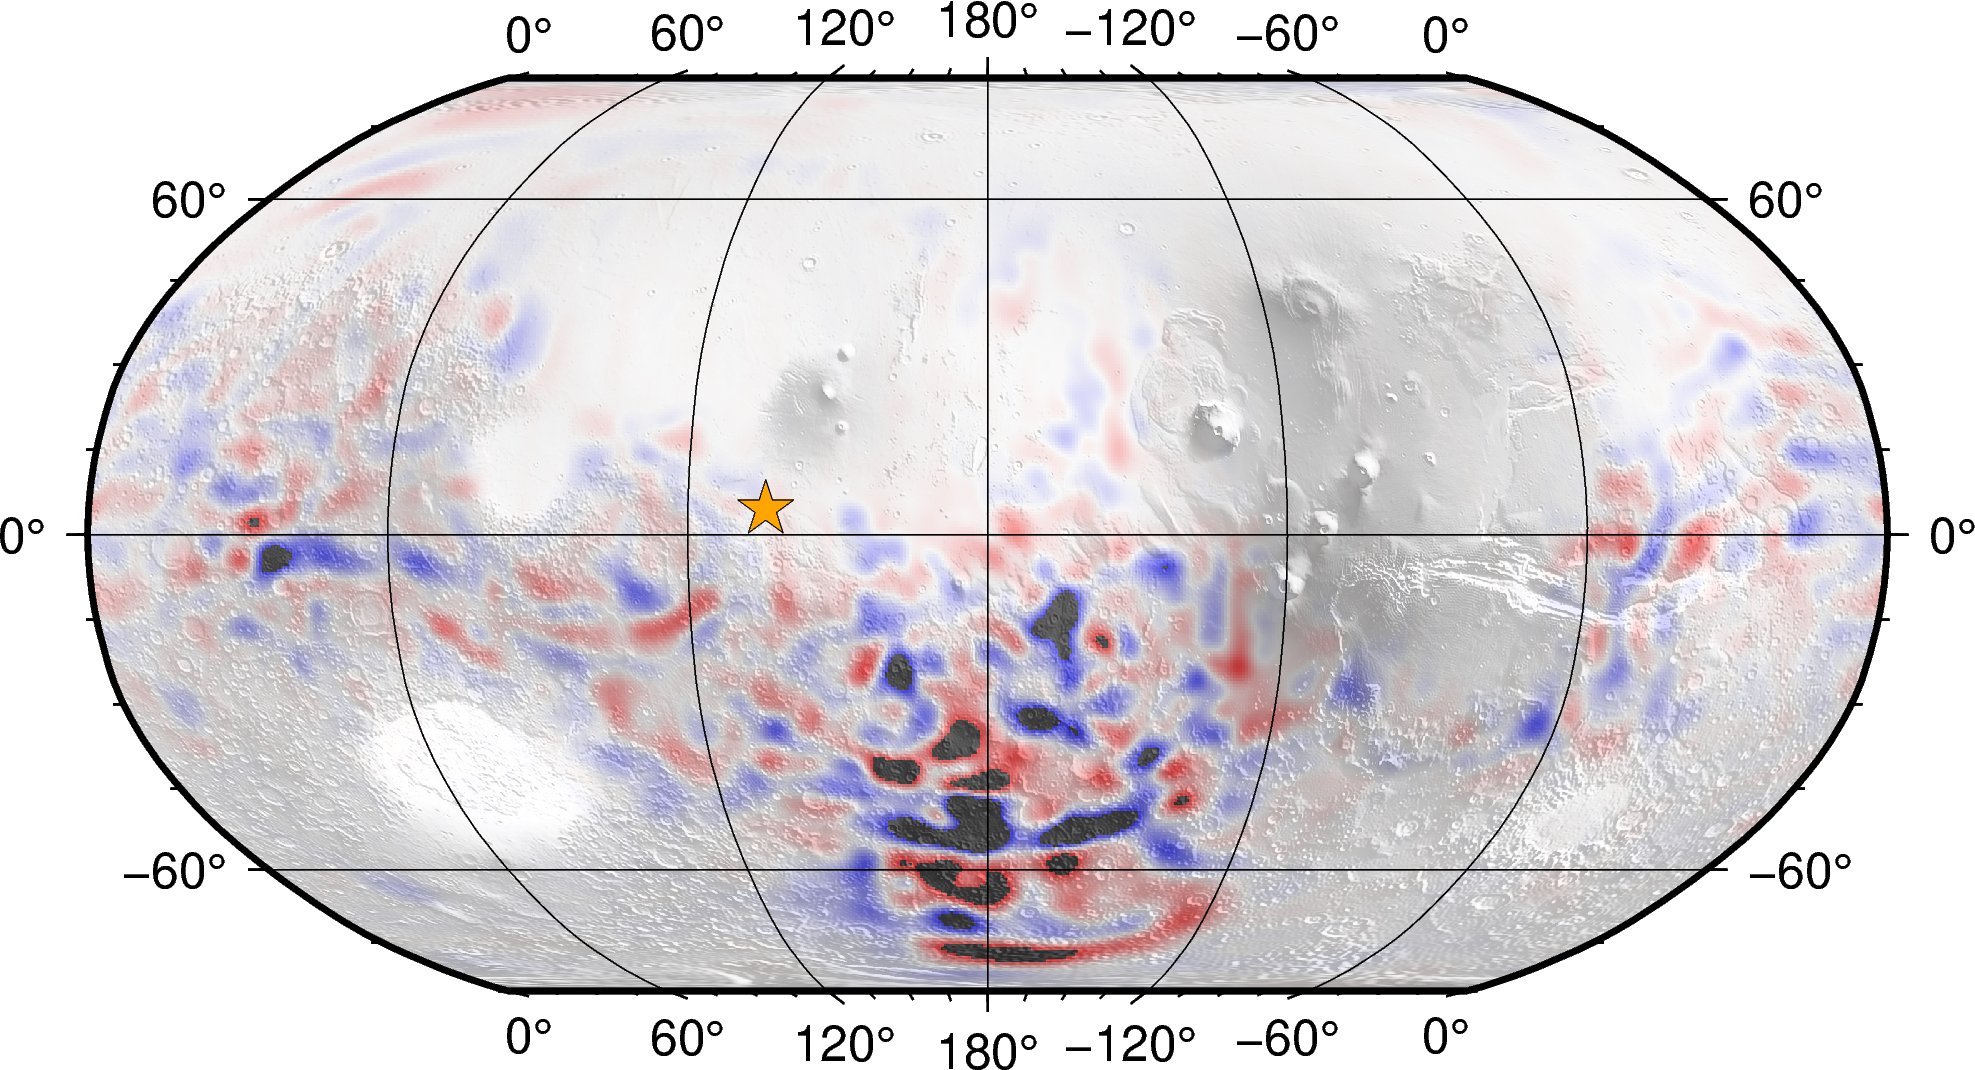

In [7]:
# make a composite image with both the magnetic field and topography
# (topography can be downloaded automatically by pyshtools, the first time you try to use it, then saved in a cache somewhere)
mars_topo_clm = pyshtools.datasets.Mars.MarsTopo2600(lmax=719) / 1000.
mars_topo_clm.coeffs[0,0,0] = 0.
mars_topo_clm.coeffs[0,2,0] = 0.

mars_topo_map = mars_topo_clm.expand()

fig = pygmt.Figure()

pygmt.config(COLOR_FOREGROUND='black', COLOR_BACKGROUND='black')
pygmt.makecpt(cmap='polar', series='-200/200', reverse=True)
fig.grdimage(region='g', projection='N6i', grid=magg.rad.to_xarray(), n='b', t=10)

pygmt.config(COLOR_FOREGROUND='white', COLOR_BACKGROUND='black')
pygmt.makecpt(cmap='gray', series='-5/8', reverse=True)
fig.grdimage(grid=mars_topo_map.to_xarray(), shading='+a45+nt1+m0.1', n='b', t=60)

fig.plot(y=4.5, x=135.62, style='a0.5c', color='orange', pen='0.1p,black') # InSight Landing Site

fig.basemap(frame='afg')
fig.show(width=1000)


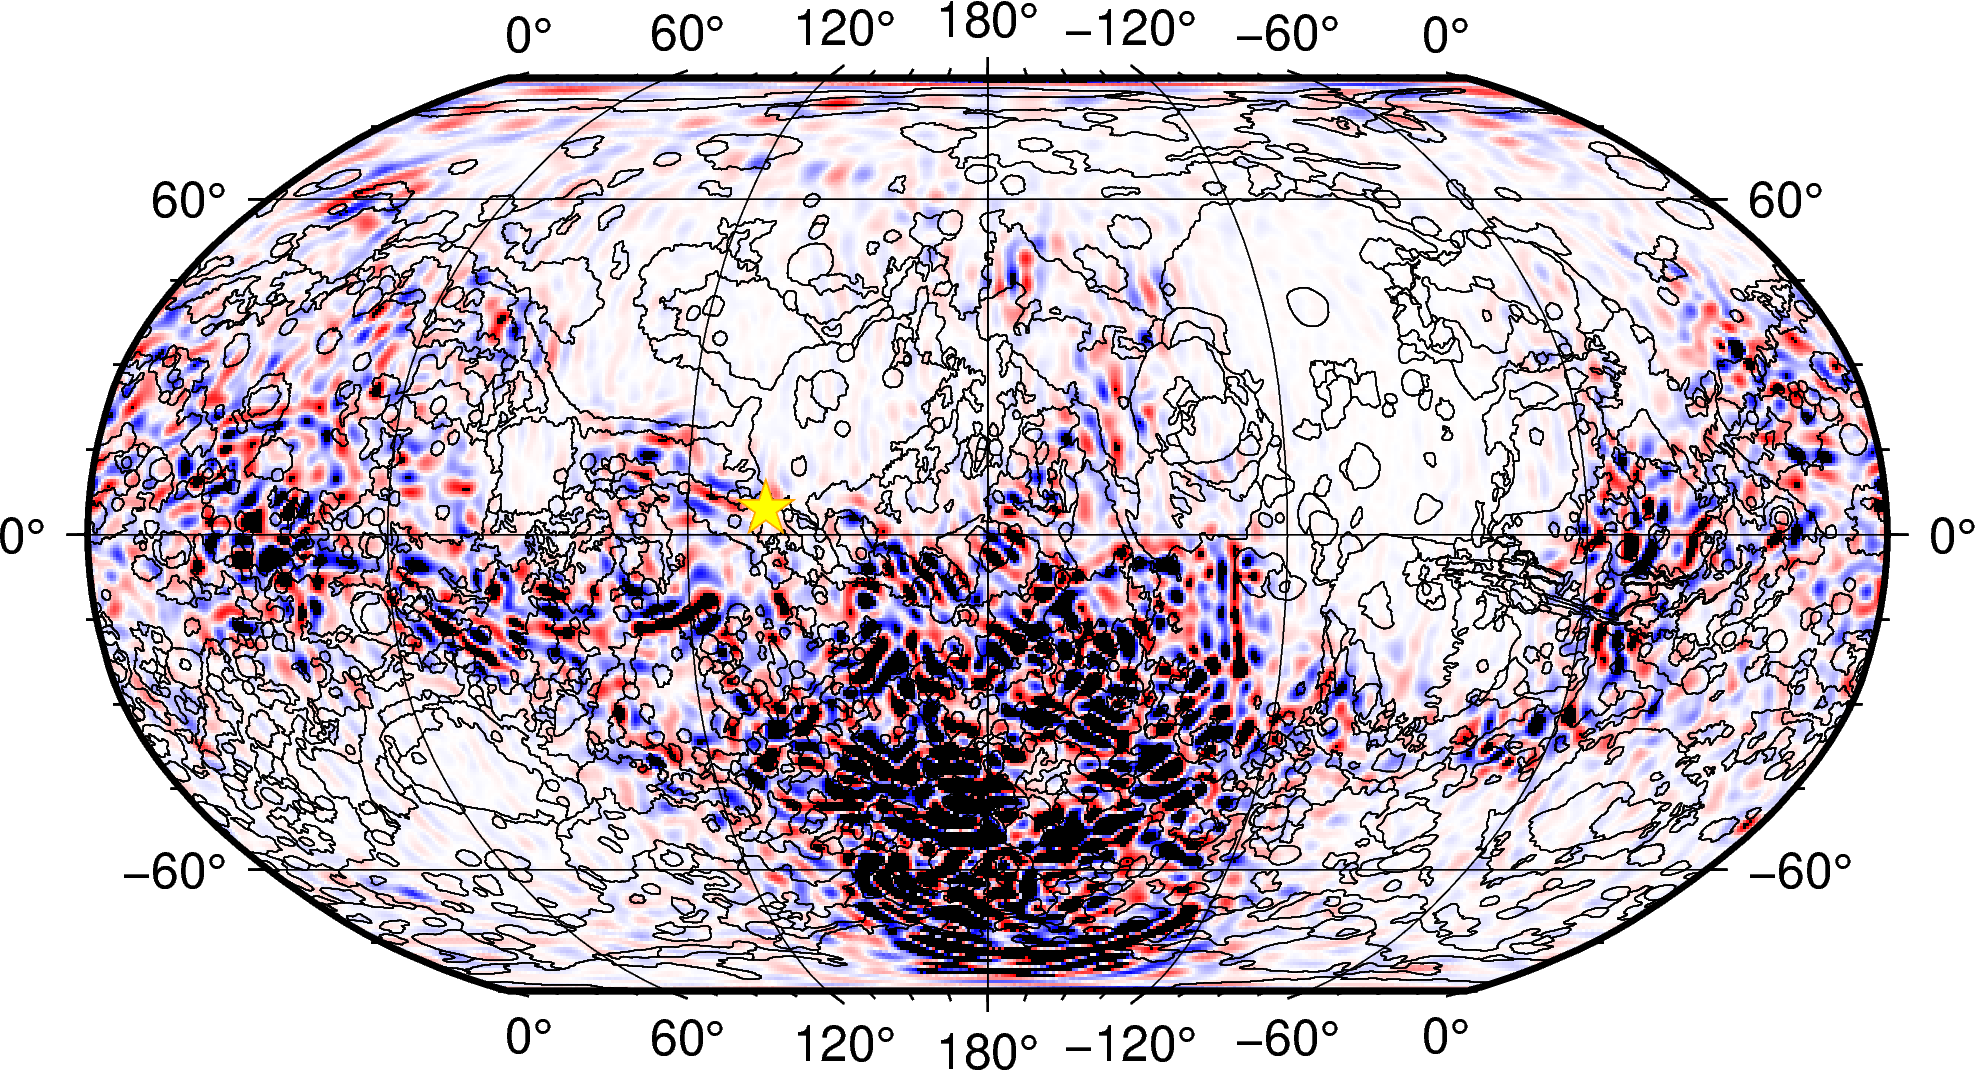

In [8]:
# plot with a shapefile overlay
magg = clmm.expand(lmax=150,a=clmm.r0)

fig = pygmt.Figure()

pygmt.config(COLOR_FOREGROUND='black', COLOR_BACKGROUND='black')
pygmt.makecpt(cmap='polar', series='-1000/1000', reverse=True)
fig.grdimage(region='g', projection='N6i', grid=magg.rad.to_xarray(), n='b')

fig.plot(data='geology/SIM3292_Shapefiles/SIM3292_Global_Geology.shp')

fig.plot(y=4.5, x=135.62, style='a0.5c', color='yellow', pen='0.25p,orange') # InSight Landing Site

fig.basemap(frame='afg')
fig.show(width=1000)

In [ ]:
# plot with a shapefile overlay
magg = clmm.expand(lmax=150,a=clmm.r0)

fig = pygmt.Figure()

pygmt.config(COLOR_FOREGROUND='black', COLOR_BACKGROUND='black')
pygmt.makecpt(cmap='polar', series='-1000/1000', reverse=True)
fig.grdimage(region='120/150/-10/20', projection='M24c', grid=magg.rad.to_xarray(), n='b')

pygmt.config(COLOR_FOREGROUND='white', COLOR_BACKGROUND='black')
pygmt.makecpt(cmap='gray', series='-5/8', reverse=True)
fig.grdimage(grid=mars_topo_map.to_xarray(), shading='+a45+nt1+m0.1', n='b', t=60)

#fig.plot(data='geology/SIM3292_Shapefiles/SIM3292_Global_Geology.shp')

fig.plot(y=4.5, x=135.62, style='a0.5c', color='orange', pen='0.1p,black') # InSight Landing Site

fig.basemap(frame='afg')
fig.show(width=1000)